In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:
df = pd.read_csv('../datasets/Mall_Customers.csv',index_col='CustomerID')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [20]:
df.columns=['Gender','Age','Income','Spending']

In [25]:
fig=px.scatter_3d(data_frame=df,x='Age',y='Income',z='Spending')
fig.show()

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [31]:
encoding=LabelEncoder()
df['Gender']=encoding.fit_transform(df['Gender'])

In [35]:
x=df[['Gender','Age','Income','Spending']]

In [37]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)

In [38]:
wcss

[308862.06000000006,
 212889.44245524297,
 143391.59236035682,
 104414.67534220166,
 75399.61541401483,
 58348.64136331505,
 51132.703212576904,
 44357.326649026654,
 40967.6035717568,
 37930.19676493098]

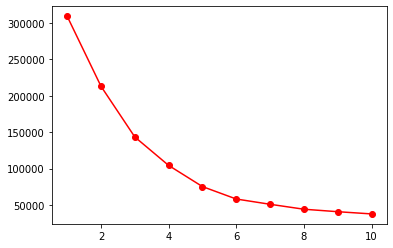

In [39]:
plt.plot(range(1,11),wcss,'or-')

In [40]:
model=KMeans(n_clusters=6)
out=model.fit_predict(x)

In [41]:
df['class']=out

In [42]:
df

,Gender,Age,Income,Spending,class
CustomerID,,,,,
1,1,19,15,39,3
2,1,21,15,81,5
3,0,20,16,6,3
4,0,23,16,77,5
5,0,31,17,40,3
...,...,...,...,...,...
196,0,35,120,79,0
197,0,45,126,28,1
198,1,32,126,74,0


In [44]:
fig = px.scatter_3d(data_frame=df,x='Age',y='Income',z='Spending',color='class')
fig.show()

In [5]:
df=pd.read_csv('../datasets/winequalityN.csv')

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
fig=px.scatter_3d(data_frame=df,x='pH',y='alcohol',z='quality')
fig.show()